In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import to_rgba
from scipy.stats import ttest_rel

In [2]:
df = pd.read_csv('dataset_carlos.csv')

In [3]:
df.tail()

,Screen,LLM,Strategy,Language,Prompt,Editable Item Label,Hidden Text,Text Contrast,Item Description,Touch Target,Item Label,Item Type Label,Context,Image Contrast,Clickable Item,Total
247,Sidebar Menu,Gemini 2.0 Flash,Few-Shot,Portuguese,2,0,2,0,0,0,0,0,0,0,0,2
248,Sidebar Menu,Gemini 2.0 Flash,Few-Shot,Portuguese,3,0,2,0,0,0,0,0,0,0,0,2
249,Sidebar Menu,Gemini 2.0 Flash,Few-Shot,English,1,0,0,0,0,0,0,0,0,0,0,0
250,Sidebar Menu,Gemini 2.0 Flash,Few-Shot,English,2,0,3,0,0,0,0,0,0,0,0,3
251,Sidebar Menu,Gemini 2.0 Flash,Few-Shot,English,3,0,3,0,0,0,0,0,0,0,0,3


In [4]:
# Verifica de há valores ausentes
df.isnull().sum()

Screen                 0
LLM                    0
Strategy               0
Language               0
Prompt                 0
Editable Item Label    0
Hidden Text            0
Text Contrast          0
Item Description       0
Touch Target           0
Item Label             0
Item Type Label        0
Context                0
Image Contrast         0
Clickable Item         0
Total                  0
dtype: int64

In [5]:
df.dtypes

Screen                 object
LLM                    object
Strategy               object
Language               object
Prompt                  int64
Editable Item Label     int64
Hidden Text             int64
Text Contrast           int64
Item Description        int64
Touch Target            int64
Item Label              int64
Item Type Label         int64
Context                 int64
Image Contrast          int64
Clickable Item          int64
Total                   int64
dtype: object

In [6]:
# Calculando as estatísticas para o estudo no geral
total_geral = df['Total'].sum()
media_geral = df['Total'].mean()
desvio_padrao_geral = df['Total'].std()

# Calculando as estatísticas para cada tipo de Request
estatisticas_request = df.groupby('Strategy')['Total'].agg(['sum', 'mean', 'std'])
estatisticas_llm = df.groupby('LLM')['Total'].agg(['sum', 'mean', 'std'])

# Exibindo os resultados
print("Estudo no Geral:")
print(f"Total de Erros: {total_geral}")
print(f"Média de Erros: {media_geral:.2f}")
print(f"Desvio Padrão: {desvio_padrao_geral:.2f}\n")

print("Estatísticas por Strategy:")
print(estatisticas_request.round(2))
print(estatisticas_llm.round(2))

Estudo no Geral:
Total de Erros: 1159
Média de Erros: 4.60
Desvio Padrão: 4.82

Estatísticas por Strategy:
           sum  mean   std
Strategy                  
Few-Shot   454   3.6  3.53
Zero-Shot  705   5.6  5.67
                   sum  mean   std
LLM                               
Chat-GPT 4.o mini  487  5.80  5.61
DeepSeek V3        289  3.44  3.86
Gemini 2.0 Flash   383  4.56  4.59


In [7]:
# Filtrando os dados para Few-Shot e Zero-Shot
few_values = df[df['Strategy'] == 'Few-Shot']['Total']
zero_values = df[df['Strategy'] == 'Zero-Shot']['Total']

# Realizando o teste t pareado
t_stat, p_value = ttest_rel(few_values, zero_values)

# Exibindo os resultados
print("==== Few-Shot e Zero-Shot GERAL ====")
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.6f}")

==== Few-Shot e Zero-Shot GERAL ====
T-statistic: -4.821
P-value: 0.000004


In [8]:
# Filtrando os dados das línguas
pt_values = df[df['Language'] == 'Portuguese']['Total']
eng_values = df[df['Language'] == 'English']['Total']

# Realizando o teste t pareado
t_stat, p_value = ttest_rel(pt_values, eng_values)

# Exibindo os resultados
print("==== PT-BR e ENG GERAL ====")
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.6f}")

==== PT-BR e ENG GERAL ====
T-statistic: 0.824
P-value: 0.411260


In [9]:
gpt = df[df['LLM'] == 'Chat-GPT 4.o mini']['Total']
deep = df[df['LLM'] == 'DeepSeek V3']['Total']
gemini = df[df['LLM'] == 'Gemini 2.0 Flash']['Total']

print("==== LLMs GERAL ====")

# Realizando o teste t pareado
t_stat, p_value = ttest_rel(gpt, deep)
print("==== Chat-GPT 4.o mini e DeepSeek V3 ====")
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.5f}\n")

t_stat, p_value = ttest_rel(gpt, gemini)
print("==== Chat-GPT 4.o mini e Gemini 2.0 Flash ====")
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.5f}\n")

t_stat, p_value = ttest_rel(deep, gemini)
print("==== DeepSeek V3 e Gemini 2.0 Flash ====")
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.5f}\n")

==== LLMs GERAL ====
==== Chat-GPT 4.o mini e DeepSeek V3 ====
T-statistic: 4.373
P-value: 0.00004

==== Chat-GPT 4.o mini e Gemini 2.0 Flash ====
T-statistic: 2.449
P-value: 0.01641

==== DeepSeek V3 e Gemini 2.0 Flash ====
T-statistic: -2.759
P-value: 0.00713



In [10]:
df_gpt = df[df['LLM'] == 'Chat-GPT 4.o mini']
df_deep = df[df['LLM'] == 'DeepSeek V3']
df_gemini = df[df['LLM'] == 'Gemini 2.0 Flash']

In [11]:
# Filtrando os dados para Few-Shot e Zero-Shot
few_values = df_gpt[df_gpt['Strategy'] == 'Few-Shot']['Total']
zero_values = df_gpt[df_gpt['Strategy'] == 'Zero-Shot']['Total']

# Realizando o teste t pareado
t_stat, p_value = ttest_rel(few_values, zero_values)

# Exibindo os resultados
print("==== Few-Shot e Zero-Shot Chat-GPT 4.o mini ====")
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.5f}")

==== Few-Shot e Zero-Shot Chat-GPT 4.o mini ====
T-statistic: -3.552
P-value: 0.00098


In [12]:
# Filtrando os dados para Few-Shot e Zero-Shot
few_values = df_deep[df_deep['Strategy'] == 'Few-Shot']['Total']
zero_values = df_deep[df_deep['Strategy'] == 'Zero-Shot']['Total']

# Realizando o teste t pareado
t_stat, p_value = ttest_rel(few_values, zero_values)

# Exibindo os resultados
print("==== Few-Shot e Zero-Shot DeepSeek V3 ====")
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.5f}")

==== Few-Shot e Zero-Shot DeepSeek V3 ====
T-statistic: -1.710
P-value: 0.09488


In [13]:
# Filtrando os dados para Few-Shot e Zero-Shot
few_values = df_gemini[df_gemini['Strategy'] == 'Few-Shot']['Total']
zero_values = df_gemini[df_gemini['Strategy'] == 'Zero-Shot']['Total']

# Realizando o teste t pareado
t_stat, p_value = ttest_rel(few_values, zero_values)

# Exibindo os resultados
print("==== Few-Shot e Zero-Shot Gemini 2.0 Flash ====")
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.5f}")

==== Few-Shot e Zero-Shot Gemini 2.0 Flash ====
T-statistic: -3.021
P-value: 0.00433


In [20]:
color_dict_llm = {'Chat-GPT 4.o mini': to_rgba('red', 0),
              'DeepSeek V3': to_rgba('red', 0),
              'Gemini 2.0 Flash': to_rgba('red', 0)}
color_dict_strategy = {'Few-Shot': to_rgba('blue', 0),
                     'Zero-Shot': to_rgba('blue', 0)}
color_dict_language = {'Portuguese': to_rgba('blue', 0),
                     'English': to_rgba('blue', 0)}

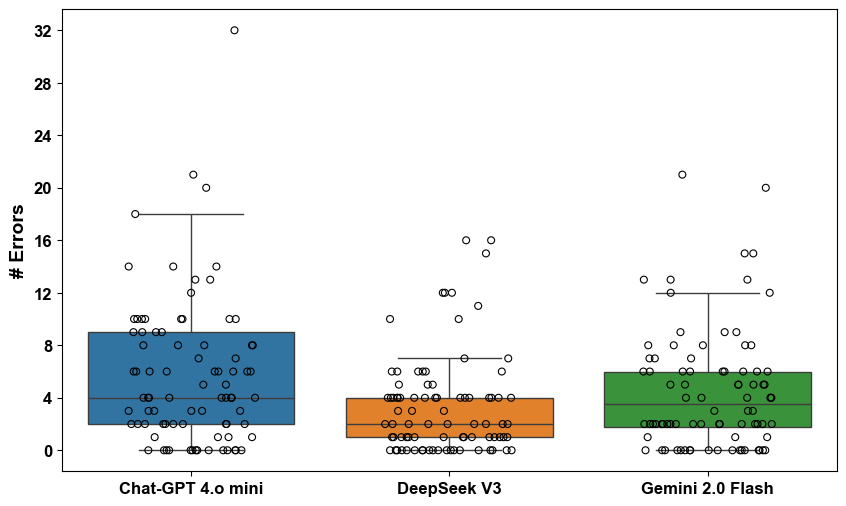

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='LLM', y='Total', hue='LLM', showfliers=False)

sns.stripplot(data=df, x='LLM', y='Total', palette=color_dict_llm, hue='LLM', edgecolor='black', linewidth=.8, jitter=0.25)

# Ajustando os ticks do eixo y para inteiros
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

plt.xlabel('')
plt.ylabel('# Errors', fontsize=14, fontweight='bold', fontfamily='Arial')
plt.xticks(fontsize=12, fontweight='bold', fontfamily='Arial')
plt.yticks(fontsize=12, fontweight='bold', fontfamily='Arial')
plt.show()

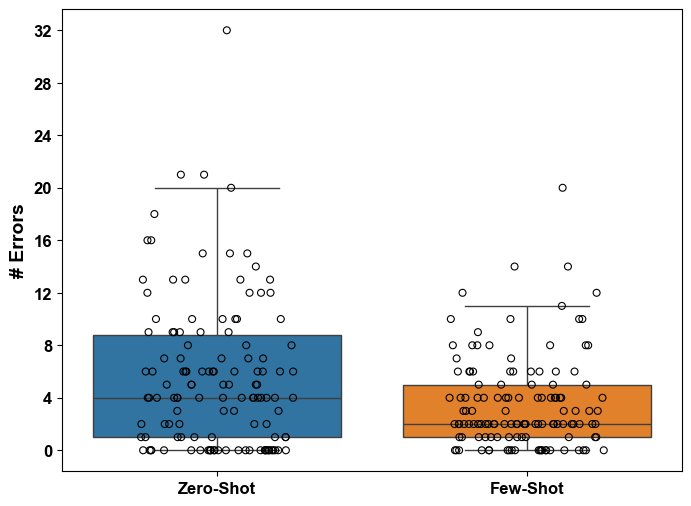

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Strategy', y='Total', hue='Strategy', showfliers=False)

sns.stripplot(data=df, x='Strategy', y='Total', palette=color_dict_strategy, hue='Strategy', edgecolor='black', linewidth=.8, jitter=0.25)

# Ajustando os ticks do eixo y para inteiros
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

plt.xlabel('')
plt.ylabel('# Errors', fontsize=14, fontweight='bold', fontfamily='Arial')
plt.xticks(fontsize=12, fontweight='bold', fontfamily='Arial')
plt.yticks(fontsize=12, fontweight='bold', fontfamily='Arial')
plt.show()

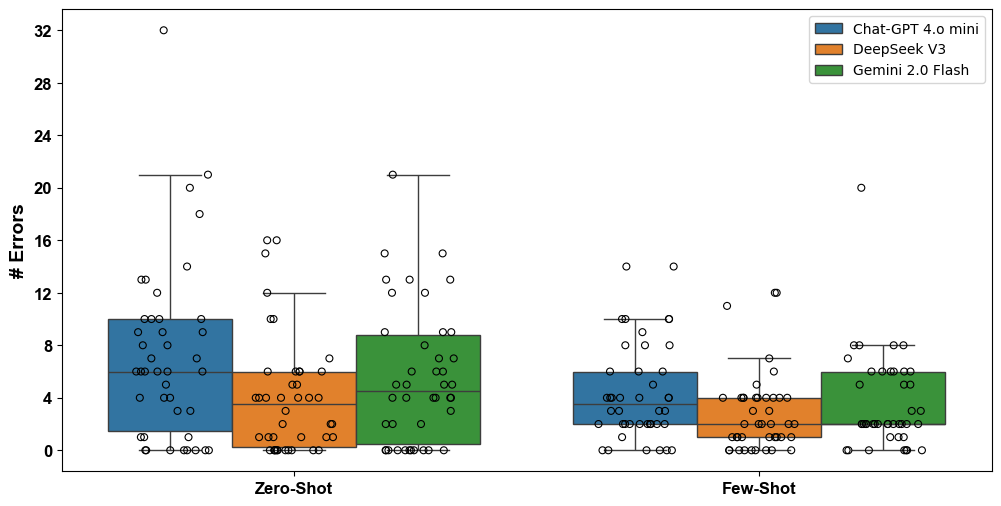

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Strategy', y='Total', hue='LLM', showfliers=False)

sns.stripplot(data=df, x='Strategy', y='Total', palette=color_dict_llm, hue='LLM', edgecolor='black', linewidth=.8, jitter=0.25, dodge=True, legend=False)

# Ajustando os ticks do eixo y para inteiros
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

plt.xlabel('')
plt.ylabel('# Errors', fontsize=14, fontweight='bold', fontfamily='Arial')
plt.xticks(fontsize=12, fontweight='bold', fontfamily='Arial')
plt.yticks(fontsize=12, fontweight='bold', fontfamily='Arial')
plt.legend(title='')
plt.show()

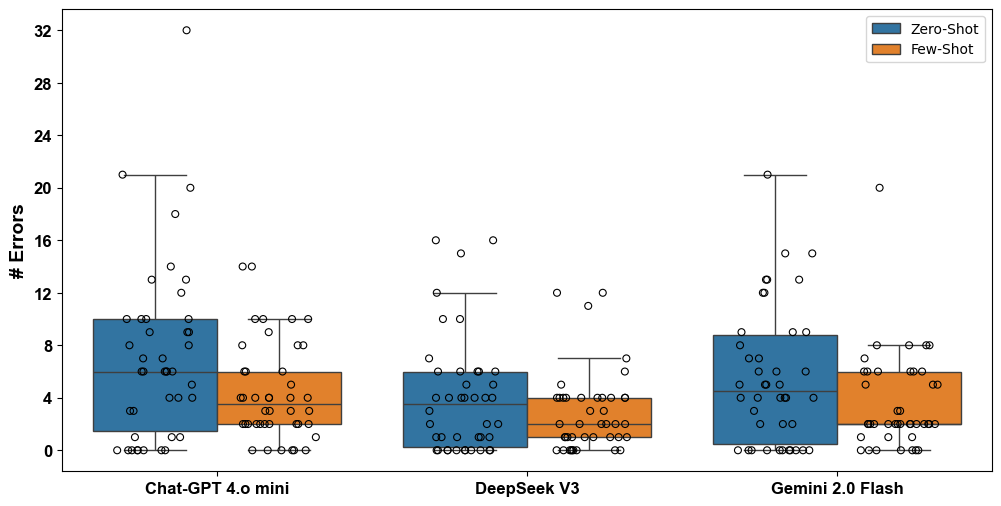

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='LLM', y='Total', hue='Strategy', showfliers=False)

sns.stripplot(data=df, x='LLM', y='Total', palette=color_dict_strategy, hue='Strategy', edgecolor='black', linewidth=.8, jitter=0.25, dodge=True, legend=False)

# Ajustando os ticks do eixo y para inteiros
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

plt.xlabel('')
plt.ylabel('# Errors', fontsize=14, fontweight='bold', fontfamily='Arial')
plt.xticks(fontsize=12, fontweight='bold', fontfamily='Arial')
plt.yticks(fontsize=12, fontweight='bold', fontfamily='Arial')
plt.legend(title='')
plt.show()

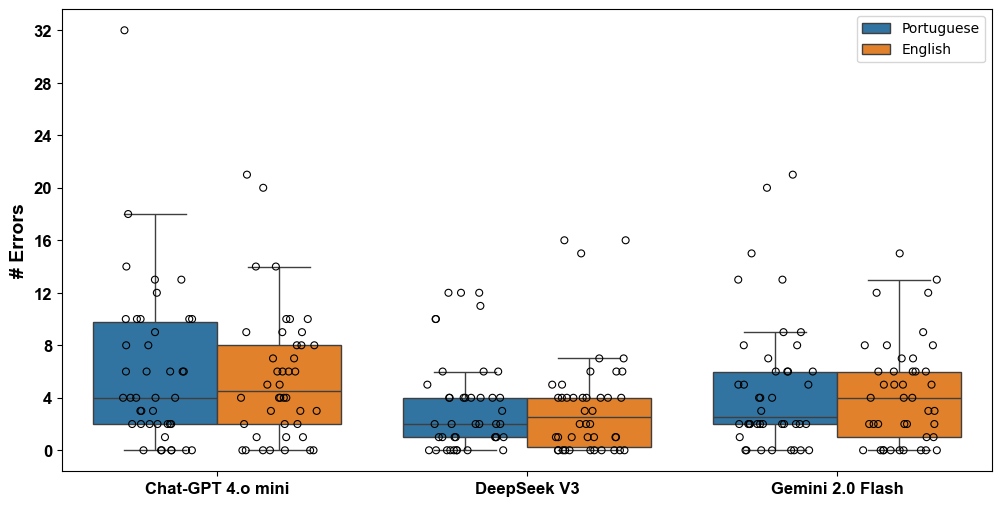

In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='LLM', y='Total', hue='Language', showfliers=False)

sns.stripplot(data=df, x='LLM', y='Total', palette=color_dict_language, hue='Language', edgecolor='black', linewidth=.8, jitter=0.25, dodge=True, legend=False)

# Ajustando os ticks do eixo y para inteiros
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

plt.xlabel('')
plt.ylabel('# Errors', fontsize=14, fontweight='bold', fontfamily='Arial')
plt.xticks(fontsize=12, fontweight='bold', fontfamily='Arial')
plt.yticks(fontsize=12, fontweight='bold', fontfamily='Arial')
plt.legend(title='')
plt.show()

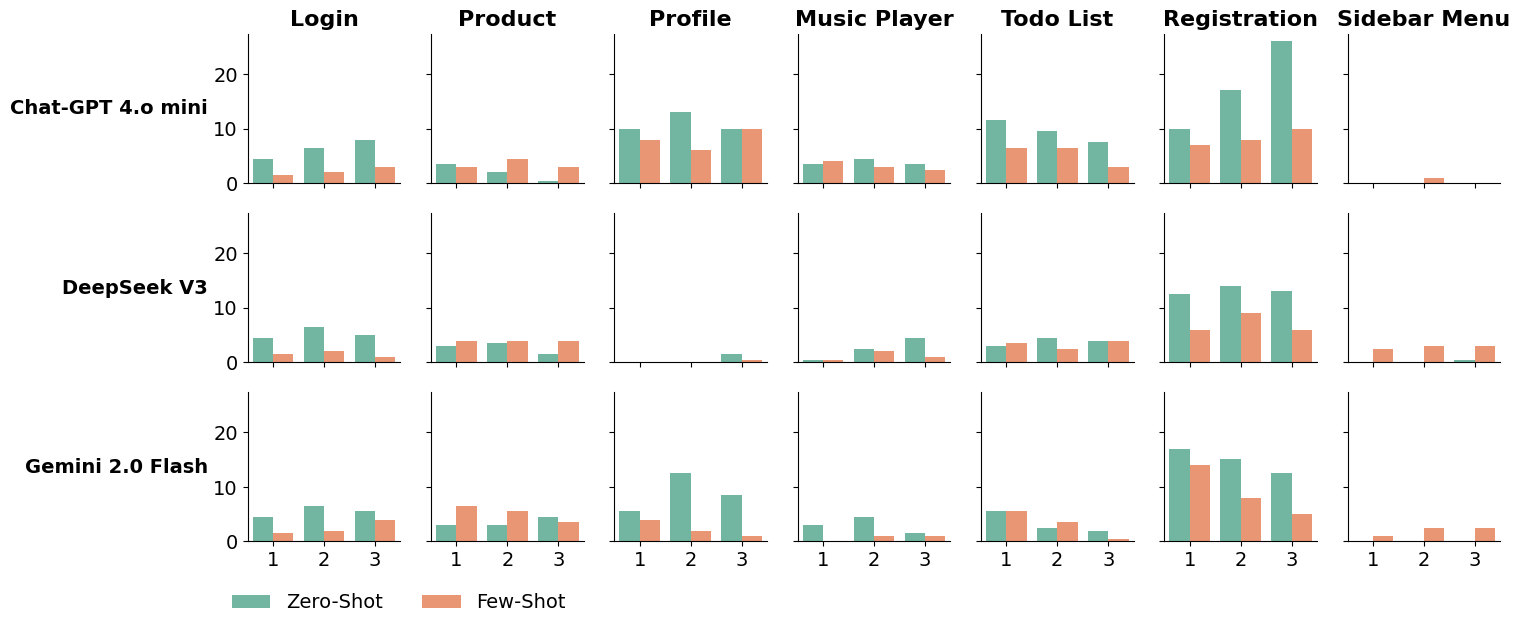

In [ ]:
# Configurando o grid de gráficos
g = sns.FacetGrid(
    df,
    row="LLM",
    col="Screen",
    margin_titles=True,
    height=2
)

# Adicionando o gráfico de barras sem linhas de variação
g.map_dataframe(
    sns.barplot,
    x="Prompt",
    y="Total",
    hue="Strategy",
    palette='Set2',
    dodge=True,
    errorbar=None  # Remove as barras de erro
)

# Ajustando a legenda
g.add_legend(
    title="",
    title_fontsize=14,
    prop={'size': 14},
    loc="lower left",
    bbox_to_anchor=(0.025, -0.05),
    ncol=2
)

# Ajustando os títulos dos eixos
g.set_axis_labels("", "")
g.set_titles(col_template="{col_name}", row_template="", size=16, weight='bold')

# Ajustando os títulos das linhas (row) para ficarem rotacionados e alinhados à esquerda
for ax, row_val in zip(g.axes[:, 0], df["LLM"].unique()):
    ax.yaxis.set_label_position("left")  # Garante que os rótulos fiquem na esquerda
    ax.set_ylabel(row_val, fontsize=14, weight='bold', rotation=0, ha='right', va='center')

# Ajustando a rotação dos rótulos do eixo x
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(0)
        label.set_fontsize(14)
    for label in ax.get_yticklabels():
        label.set_fontsize(14)

# Ajustando o layout
plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()

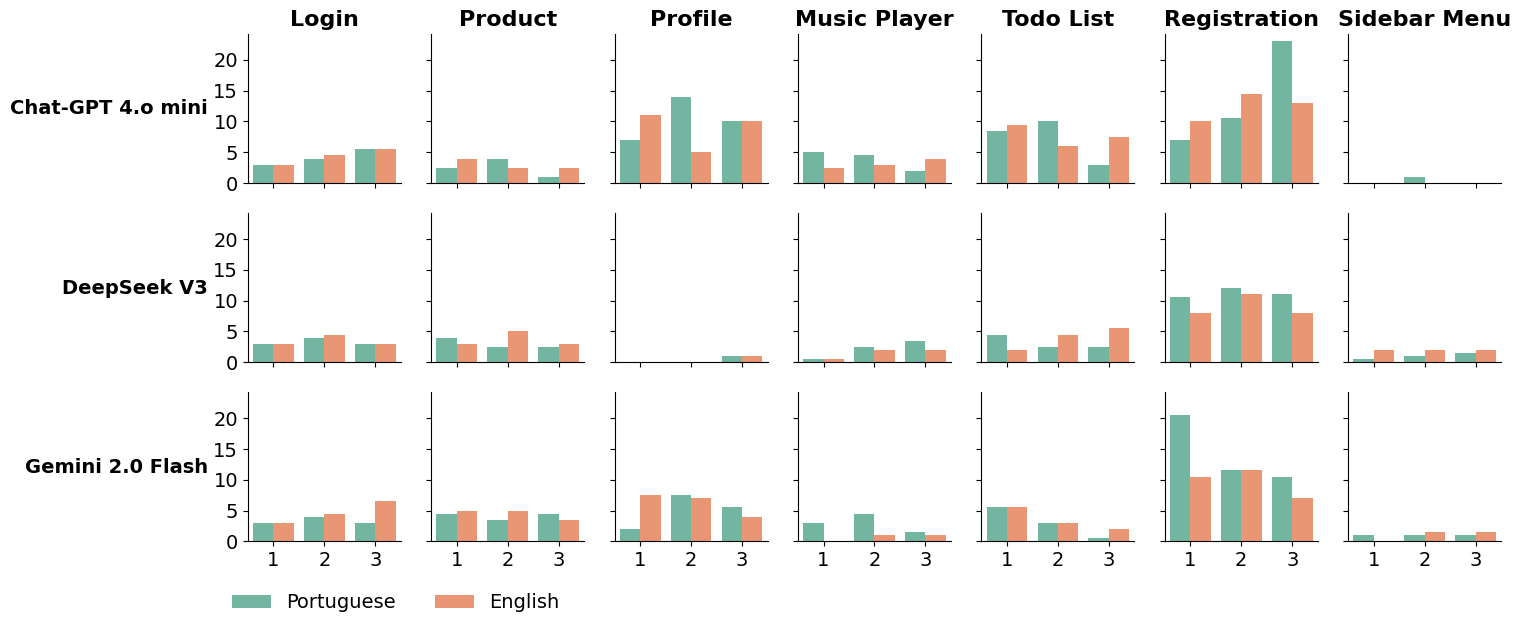

In [35]:
# Configurando o grid de gráficos
g = sns.FacetGrid(
    df,
    row="LLM",
    col="Screen",
    margin_titles=True,
    height=2
)

# Adicionando o gráfico de barras sem linhas de variação
g.map_dataframe(
    sns.barplot,
    x="Prompt",
    y="Total",
    hue="Language",
    palette='Set2',
    dodge=True,
    errorbar=None  # Remove as barras de erro
)

# Ajustando a legenda
g.add_legend(
    title="",
    title_fontsize=14,
    prop={'size': 14},
    loc="lower left",
    bbox_to_anchor=(0.025, -0.05),
    ncol=2
)

# Ajustando os títulos dos eixos
g.set_axis_labels("", "")
g.set_titles(col_template="{col_name}", row_template="", size=16, weight='bold')

# Ajustando os títulos das linhas (row) para ficarem rotacionados e alinhados à esquerda
for ax, row_val in zip(g.axes[:, 0], df["LLM"].unique()):
    ax.yaxis.set_label_position("left")  # Garante que os rótulos fiquem na esquerda
    ax.set_ylabel(row_val, fontsize=14, weight='bold', rotation=0, ha='right', va='center')

# Ajustando a rotação dos rótulos do eixo x
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(0)
        label.set_fontsize(14)
    for label in ax.get_yticklabels():
        label.set_fontsize(14)

# Ajustando o layout
plt.subplots_adjust(hspace=0.2, wspace=0.2)  # Adiciona espaço horizontal entre os gráficos
plt.show()

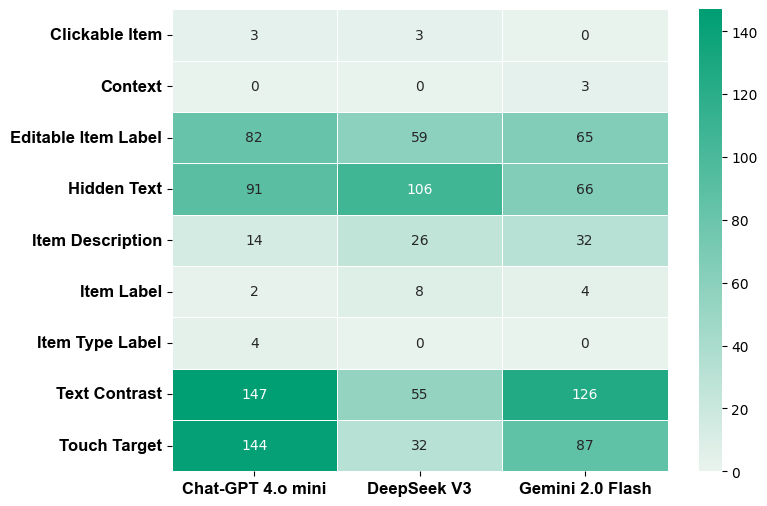

In [ ]:
data = df.pivot_table(index='LLM', values=['Context', 'Touch Target', 'Text Contrast', 'Item Description', 'Hidden Text', 'Item Label', 'Item Type Label', 'Editable Item Label', 'Clickable Item'], aggfunc='sum')

# Criar o heatmap com eixos invertidos
plt.figure(figsize=(8, 6))
ax = sns.heatmap(data.T, annot=True, fmt='d', cmap=sns.light_palette("#009E73", as_cmap=True), linewidths=.5)
plt.title('')
plt.xlabel('')
plt.xticks(fontweight='bold', fontsize=12, fontfamily='Arial')
plt.yticks(fontweight='bold', fontsize=12, fontfamily='Arial')
plt.show()

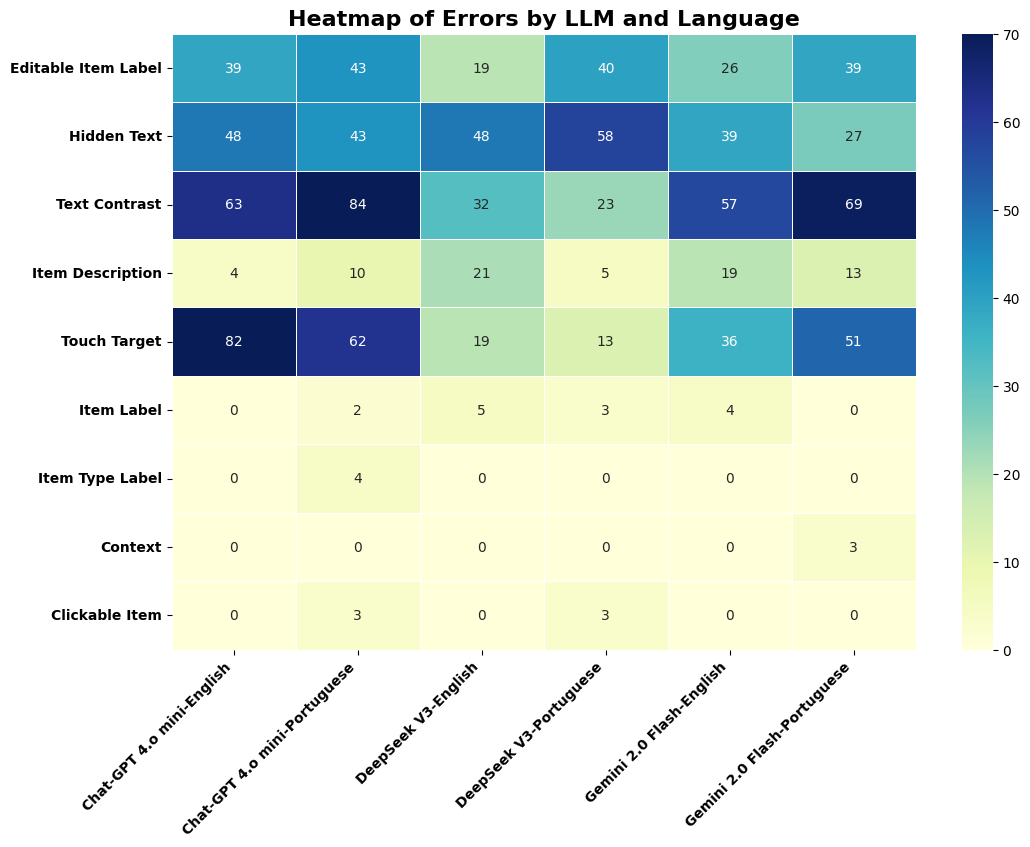

In [34]:
# Criando o DataFrame com os dados fornecidos
heatmap_data = pd.DataFrame({
    ('Chat-GPT 4.o mini', 'English'): [39, 48, 63, 4, 82, 0, 0, 0, 0],
    ('Chat-GPT 4.o mini', 'Portuguese'): [43, 43, 84, 10, 62, 2, 4, 0, 3],
    ('DeepSeek V3', 'English'): [19, 48, 32, 21, 19, 5, 0, 0, 0],
    ('DeepSeek V3', 'Portuguese'): [40, 58, 23, 5, 13, 3, 0, 0, 3],
    ('Gemini 2.0 Flash', 'English'): [26, 39, 57, 19, 36, 4, 0, 0, 0],
    ('Gemini 2.0 Flash', 'Portuguese'): [39, 27, 69, 13, 51, 0, 0, 3, 0]
}, index=[
    'Editable Item Label', 'Hidden Text', 'Text Contrast', 'Item Description',
    'Touch Target', 'Item Label', 'Item Type Label', 'Context', 'Clickable Item'
])

# Criando o heatmap
plt.figure(figsize=(12, 8))
ax = sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5, vmax=70)

# Ajustando os rótulos
ax.set_title('Heatmap of Errors by LLM and Language', fontsize=16, fontweight='bold')
ax.set_xlabel('')
ax.set_ylabel('')

plt.xticks(fontsize=10, rotation=45, ha='right', fontweight='bold')
plt.yticks(fontsize=10, rotation=0, fontweight='bold')

plt.show()